# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def MDS(D):
    '''
    This function computes MDS with a distance matrix
    :param D: input distance matrix
    :return: V_tilde, whose rows are result configurations, and the eigenvalues
    '''
    P = D.shape[0]  # D is a symmetric distrance matrix
    A = -0.5 * D**2
    H = np.eye(P) - np.ones((P, P))/P
    B = H@A@H
    w, V = np.linalg.eig(B)
    V = V[:, np.flip(np.argsort(w), axis=0)]
    w = w[np.flip(np.argsort(w), axis=0)]
    V = V[:, w>0]
    w = w[w>0]
    V_tilde = V * np.sqrt(w[None, :])

    return V_tilde, w

In [3]:
#Inverness, Glasgow, Newcastle, Carlisle, Leeds, Hull
#Norwich, Aberystwyth, London, Dover, Brighton, Exeter.
M = np.array([[0,244,218,284,197,312,215,469,166,212,253,270],
[0,0,350,77,167,444,221,583,242,53,325,168],
[0,0,0,369,347,94,150,251,116,298,57,284],
[0,0,0,0,242,463,263,598,257,72,340,164],
[0,0,0,0,0,441,279,598,269,170,359,277],
[0,0,0,0,0,0,245,169,210,392,143,378],
[0,0,0,0,0,0,0,380,55,168,117,143],
[0,0,0,0,0,0,0,0,349,531,264,514],
[0,0,0,0,0,0,0,0,0,190,91,173],
[0,0,0,0,0,0,0,0,0,0,273,111],
[0,0,0,0,0,0,0,0,0,0,0,256],
[0,0,0,0,0,0,0,0,0,0,0,0]])
D = M+M.T

In [4]:
res, evals = MDS(D)

In [5]:
cities = ['Inverness', 'Glasgow', 'Newcastle', 'Carlisle', 'Leeds', 'Hull', 'Norwich', 'Aberystwyth', 'London', 'Dover', 'Brighton', 'Exeter']
cities = sorted(cities)

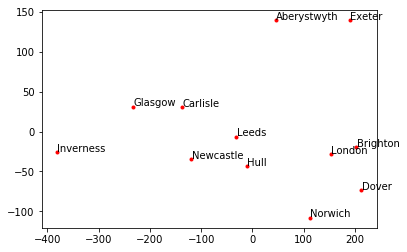

In [6]:
plt.plot(res[:, 0], res[:, 1], 'r.')
for i in range(res.shape[0]):
    plt.text(res[i, 0]+1, res[i, 1]+1, cities[i])
plt.show()

In [7]:
print(np.mean(res, 0))

[  7.10542736e-15  -3.43428989e-14   4.26325641e-14  -5.16623781e-14
   5.53631215e-14  -2.04281037e-14   1.05545202e-13   1.95339693e-12]


In [8]:
print(evals)

[  3.94541245e+05   6.28847044e+04   1.46985724e+04   1.19944339e+04
   4.06510867e+03   1.30067146e+03   9.22501071e+02   1.01657323e+01]


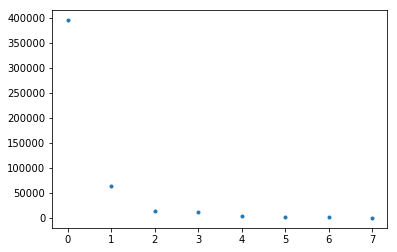

In [9]:
plt.plot(evals, '.')

# Problem 2

Remove Aberystwyth and use the rest of points.

In [10]:
def LMDS(D, dist_a, V_tilde_inv):
    '''
    :param D: the landscape marks distance matrix (not squared)
    :param dist_a: the distance vector from new point to landscape points(not squared)
    :param V_tilde_inv: the pseudo inverse of V_tilde
    :return: the configuration of the new point
    '''
    P = D.shape[0]  # dimension of data
    d_mean = (np.mean(D**2, axis= 1)).reshape(P, 1)
    d_a = (dist_a**2).reshape(P, 1)
    return -0.5*(V_tilde_inv.T@(d_a - d_mean))

In [11]:
D_new = np.delete(D, [0], 0)
D_new = np.delete(D_new, [0], 1)
V_tilde, lamb = MDS(D_new)

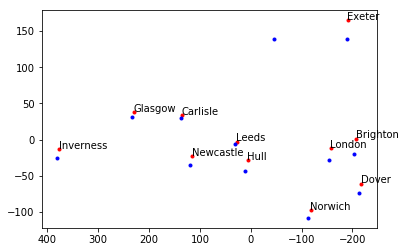

In [12]:
plt.plot(V_tilde[:, 0], V_tilde[:, 1], 'r.')
plt.plot(-res[:, 0], res[:, 1], 'b.')
for i in range(V_tilde.shape[0]):
    plt.text(V_tilde[i, 0]+1, V_tilde[i, 1]+1, cities[i+1])
plt.gca().invert_xaxis()
plt.show()

In [13]:
V_tilde_inv = V_tilde / lamb[None, :]
x_a = LMDS(D_new, D[1:, 0], V_tilde_inv)

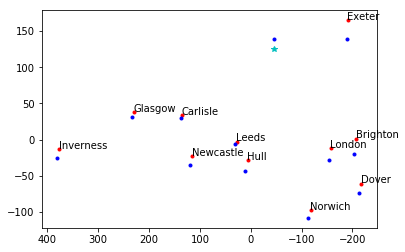

In [14]:
plt.plot(V_tilde[:, 0], V_tilde[:, 1], 'r.')
plt.plot(-res[:, 0], res[:, 1], 'b.')
for i in range(V_tilde.shape[0]):
    plt.text(V_tilde[i, 0]+1, V_tilde[i, 1]+1, cities[i+1])
plt.gca().invert_xaxis()
plt.plot(x_a[0, 0], x_a[1, 0], 'c*')
plt.show()

In [15]:
import matplotlib.pyplot as plt
x  = plt.imread('s.png')

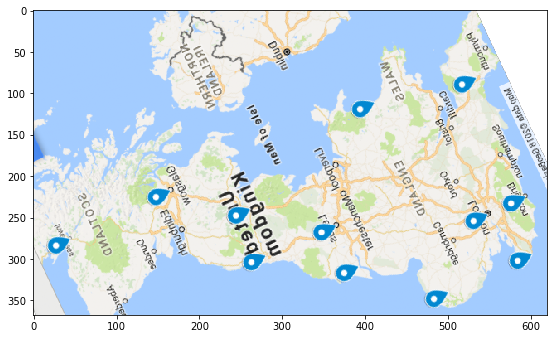

In [16]:
rows, cols = x.shape[0], x.shape[1]
import cv2
M = cv2.getRotationMatrix2D((cols/2,rows/2),65,1)

dst = cv2.warpAffine(x,M,(cols,rows))
dst = cv2.flip(dst, 0)
#plt.imshow(dst)
dst = dst[400:, 580:1200, :]
plt.figure(figsize=(dst.shape[0]/40, dst.shape[1]/40))
plt.imshow(dst)

## quantify loss

In [30]:
from scipy.spatial import distance_matrix
D_MDS = distance_matrix(res[:,:2], res[:,:2])
new_config = np.vstack((x_a[:2].reshape(1,2), V_tilde[:, :2]))
D_LMDS = distance_matrix(new_config, new_config)

print(np.linalg.norm(D_MDS-D)/np.linalg.norm(D))
print(np.linalg.norm(D_LMDS-D)/np.linalg.norm(D))

0.0510754538948
0.0612516643401


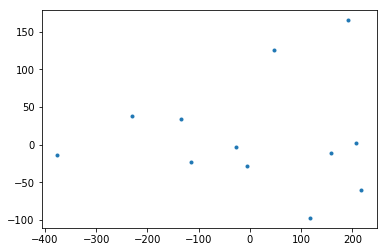

In [28]:
plt.plot(-new_config[:, 0], new_config[:, 1], '.')